In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("Stats_survey.csv")

In [12]:
# Přejmenování sloupců
data.rename(
    columns={
        "Timestamp": "Timestamp",
        "Your Sex?": "Sex",
        "Your Matric (grade 12) Average/ GPA (in %)": "Matric_GPA",
        "What year were you in last year (2023) ?": "Year",
        "What faculty does your degree fall under?": "Faculty",
        "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)": "Yearly_GPA",
        "Your Accommodation Status Last Year (2023)": "Accommodation",
        "Monthly Allowance in 2023": "Monthly_Allowance",
        "Were you on scholarship/bursary in 2023?": "Scholarship",
        "Additional amount of studying (in hrs) per week": "Study_Hours",
        "How often do you go out partying/socialising during the week? ": "Socialising_Frequency",
        "On a night out, how many alcoholic drinks do you consume?": "Drinks_Per_Night",
        "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)": "Missed_Classes",
        "How many modules have you failed thus far into your studies?": "Modules_Failed",
        "Are you currently in a romantic relationship?": "In_Relationship",
        "Do your parents approve alcohol consumption?": "Parents_Approve",
        "How strong is your relationship with your parent/s?": "Relationship_Parents",
    },
    inplace=True,
)

In [13]:
# data.info()
# data.nunique()

for column in data.columns:
    print(f"Column: {column} | Total records: {data[column].size} | Missing values: {
          data[column].isna().sum()} | Data type: {data[column].dtype} | Unique values: {data[column].nunique()}")

Column: Timestamp | Total records: 406 | Missing values: 0 | Data type: object | Unique values: 400
Column: Sex | Total records: 406 | Missing values: 2 | Data type: object | Unique values: 2
Column: Matric_GPA | Total records: 406 | Missing values: 7 | Data type: float64 | Unique values: 43
Column: Year | Total records: 406 | Missing values: 73 | Data type: object | Unique values: 5
Column: Faculty | Total records: 406 | Missing values: 7 | Data type: object | Unique values: 8
Column: Yearly_GPA | Total records: 406 | Missing values: 86 | Data type: float64 | Unique values: 45
Column: Accommodation | Total records: 406 | Missing values: 23 | Data type: object | Unique values: 2
Column: Monthly_Allowance | Total records: 406 | Missing values: 31 | Data type: object | Unique values: 5
Column: Scholarship | Total records: 406 | Missing values: 8 | Data type: object | Unique values: 2
Column: Study_Hours | Total records: 406 | Missing values: 3 | Data type: object | Unique values: 5
Colum

In [14]:
data["Timestamp"] = pd.to_datetime(
    data["Timestamp"], format="%Y/%m/%d %I:%M:%S %p  EET"
)

In [15]:
# Základní statistiky kvantitativních proměnných
data.describe()

,Timestamp,Matric_GPA,Yearly_GPA
count,406,399.000000,320.000000
mean,2024-03-08 12:03:31.975369472,77.989724,66.268469
min,2024-03-07 17:12:01,34.000000,30.000000
25%,2024-03-07 17:59:29.249999872,74.000000,60.000000
50%,2024-03-07 20:55:54,78.000000,65.000000
75%,2024-03-08 09:58:36.750000128,83.000000,73.000000
max,2024-03-16 22:30:36,99.000000,95.220000
std,NaN,7.048618,9.147906


In [16]:
# data["Sex"].value_counts()

# Frekvence kategorií pro vybrané kategorické proměnné
for col in data[["Sex", "Accommodation", "Monthly_Allowance"]]:
    # print(col)
    print(f"Frekvence v kategorii {col}:\n{data[col].value_counts()}\n")

Frekvence v kategorii Sex:
Sex
Male      216
Female    188
Name: count, dtype: int64

Frekvence v kategorii Accommodation:
Accommodation
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

Frekvence v kategorii Monthly_Allowance:
Monthly_Allowance
R 4001- R 5000     159
R 5001 - R 6000    101
R 6001 - R 7000     58
R 7001 - R 8000     30
R 8000+             27
Name: count, dtype: int64



[Text(0.5, 1.0, 'Histogram ročních GPA'),
 Text(0.5, 0, 'Yearly GPA'),
 Text(0, 0.5, 'Počet studentů')]

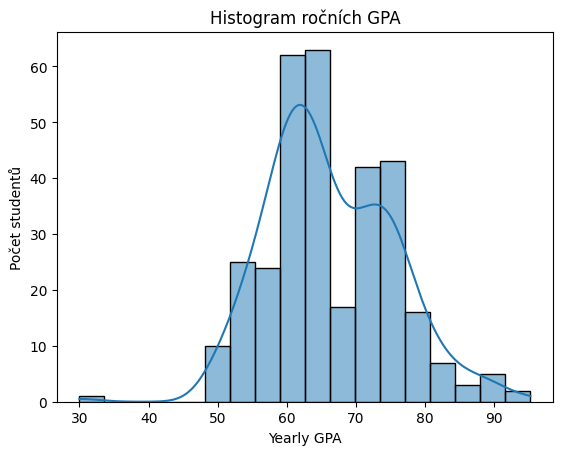

In [17]:
# Histogram pro Yearly GPA
ax = sns.histplot(data["Yearly_GPA"], kde=True)
ax.set(title="Histogram ročních GPA", xlabel="Yearly GPA", ylabel="Počet studentů")

[Text(0.5, 1.0, 'Boxplot ročních GPA'), Text(0.5, 0, 'Yearly GPA')]

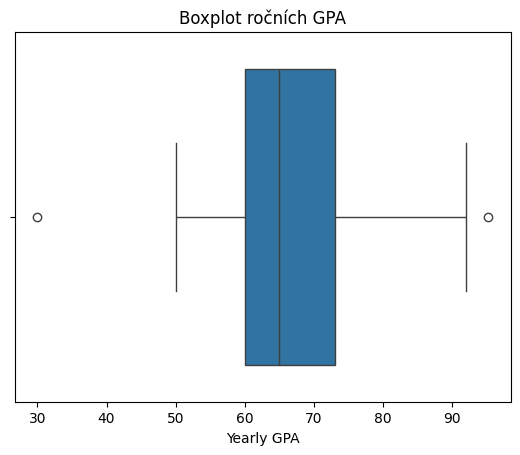

In [18]:
# Boxplot pro Yearly GPA
ax = sns.boxplot(x=data["Yearly_GPA"])
ax.set(title="Boxplot ročních GPA", xlabel="Yearly GPA")

[Text(0.5, 1.0, 'Počet žen a mužů v datasetu'),
 Text(0.5, 0, 'Pohlaví'),
 Text(0, 0.5, 'Počet studentů')]

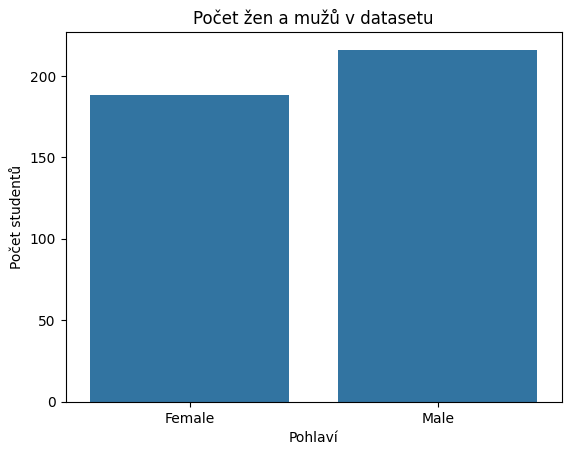

In [19]:
# Sloupcový graf pro počet žen vs. mužů
ax = sns.countplot(x=data["Sex"])
ax.set(title="Počet žen a mužů v datasetu",
       xlabel="Pohlaví", ylabel="Počet studentů")

In [20]:
pivot_table = pd.crosstab(data["Faculty"], data["Sex"])
pivot_table

Sex,Female,Male
Faculty,,
AgriSciences,8,14
Arts & Social Sciences,31,16
Economic & Management Sciences,85,126
Education,6,0
Engineering,12,25
Law,6,4
Medicine and Health Services,8,2
Science,27,29


In [21]:
# pd.set_option("future.no_silent_downcasting", True)

# Odstranění záznamů, kde chybí informace o měsíčním kapesném
data.dropna(subset=["Monthly_Allowance"], inplace=True)

# Slovník pro mapování textových rozsahů na číselné hodnoty
allowance_mapping = {
    "R 4001- R 5000": 4500,
    "R 5001 - R 6000": 5500,
    "R 6001 - R 7000": 6500,
    "R 7001 - R 8000": 7500,
    "R 8000+": 8000,
}

# Nahrazení textových hodnot ve sloupci 'Monthly_Allowance' pomocí mapovacího slovníku
data["Monthly_Allowance"] = (
    data["Monthly_Allowance"].replace(allowance_mapping).astype(int)
)

data = data[data["Year"] != "Postgraduate"]

C:\Users\nobic\AppData\Local\Temp\ipykernel_22148\2050754660.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Monthly_Allowance"].replace(allowance_mapping).astype(int)


Text(0, 0.5, 'Roční GPA')

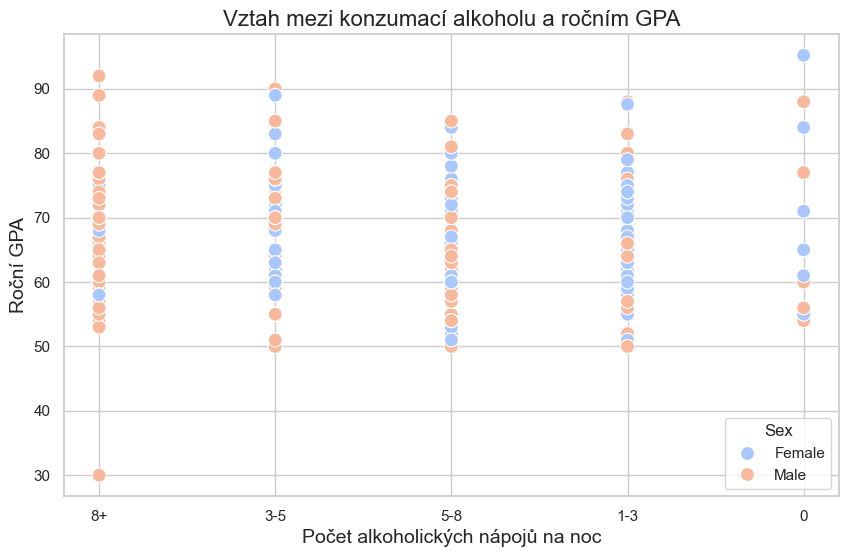

In [22]:
# Vytvoření scatter plotu přímo v Seaborn
sns.set(style="whitegrid")  # nastavení stylu grafu

# Velikost grafu lze nastavit pomocí Figure objektu
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(
    x="Drinks_Per_Night",
    y="Yearly_GPA",
    hue="Sex",
    palette="coolwarm",
    s=100,
    data=data,
)

ax.set_title(
    "Vztah mezi konzumací alkoholu a ročním GPA", fontsize=16
)  # Nastavení titulku
ax.set_xlabel(
    "Počet alkoholických nápojů na noc", fontsize=14
)  # Nastavení popisku x osy
ax.set_ylabel("Roční GPA", fontsize=14)  # Nastavení popisku y osy

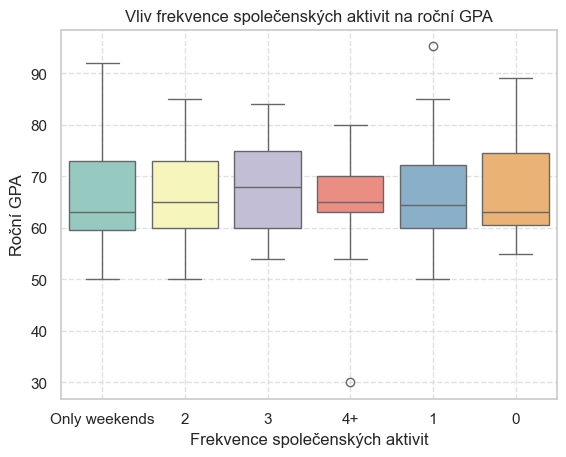

In [23]:
# 2. Vliv frekvence společenských aktivit na akademický výkon
# Box Plot: Vizualizace rozdělení GPA podle frekvence společenských aktivit.

# Vytvoření box plotu s lepší barevnou paletou a vlastními nastaveními přímo pomocí Seaborn
ax = sns.boxplot(
    x="Socialising_Frequency",
    y="Yearly_GPA",
    data=data,
    palette="Set3",
    hue="Socialising_Frequency",
)

# Nastavení popisků a titulku pomocí ax.set()
ax.set(
    xlabel="Frekvence společenských aktivit",  # Název osy X
    ylabel="Roční GPA",  # Název osy Y
    title="Vliv frekvence společenských aktivit na roční GPA",  # Titulek grafu
)

# Přidání mřížky pro lepší čitelnost
ax.grid(True, linestyle="--", alpha=0.6)

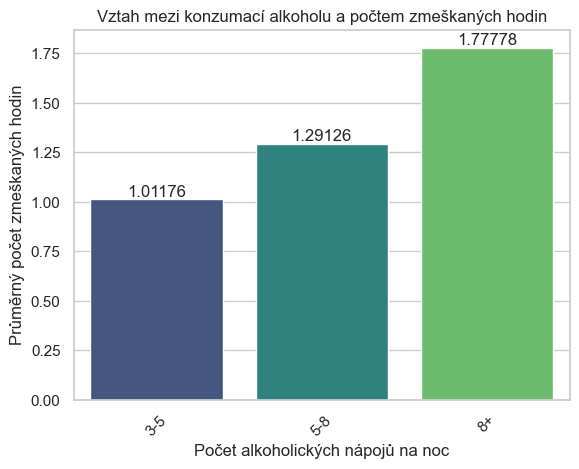

In [24]:
# Řazení podle 'Drinks_Per_Night'
sort_order = ["3-5", "5-8", "8+"]
data["Drinks_Per_Night"] = pd.Categorical(
    data["Drinks_Per_Night"], categories=sort_order, ordered=True
)
data.sort_values("Drinks_Per_Night", inplace=True)
data["Missed_Classes"] = data["Missed_Classes"].replace({"4+": 5}).astype(float)


# 3. Souvislost mezi konzumací alkoholu a absencí ve škole
# Bar Plot: Graf zobrazuje průměrný počet zmeškaných hodin ve škole v závislosti na množství konzumovaného alkoholu.
# Vytvoření bar plotu s lepší barevnou paletou
ax = sns.barplot(
    x="Drinks_Per_Night",
    y="Missed_Classes",
    data=data,
    palette="viridis",
    hue="Drinks_Per_Night",
    legend=False,
    errorbar=None,
)

# Nastavení titulků a popisků pomocí Seaborn (ax.set)
ax.set(
    xlabel="Počet alkoholických nápojů na noc",
    ylabel="Průměrný počet zmeškaných hodin",
    title="Vztah mezi konzumací alkoholu a počtem zmeškaných hodin",
)

# Případná úprava úhlu popisků na osách
ax.tick_params(axis="x", rotation=45)

# Přidání popisků nad každým sloupcem
for container in ax.containers:
    ax.bar_label(container, label_type="edge")